<a href="https://colab.research.google.com/github/Cho-Yi-Ju/red-wine-quality/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
datapath = '/content/gdrive/My Drive/'

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import classification_report ,accuracy_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score


data = pd.read_csv(datapath + "winequality-red.csv", header = 0 , encoding="utf-8")

feature_name = ["fixed acidity" , "volatile acidity","citric acid","residual sugar","chlorides"
                ,"free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]

X = data[feature_name]
'''
data['quality'] = data['quality'].map({
        3 : 0,
        4 : 0,
        5 : 0,
        6 : 0,
        7 : 1,
        8 : 1         
}) 
'''
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


RandomForest = RandomForestClassifier(n_estimators = 100 , random_state=4)
decision = RandomForest.fit(X_train , y_train)
scores = cross_val_score(decision, X_train, y_train, cv=5)
Sum = 0 
for i in range(len(scores)):
    Sum += scores[i]
Valid = Sum/5
train_pred = decision.predict(X_train)
y_pred = decision.predict(X_test)
label = set()
for y_p in y_pred:
    label.add(y_p)
label = list(label)

#mat = confusion_matrix(y_test, y_pred)
#sns.heatmap(mat.T,xticklabels = True, yticklabels=True, square=True, annot=True, fmt='d', cbar=True)
#plt.xlabel('true label')
#plt.ylabel('predicted label')
print(classification_report(y_test , y_pred , labels=label))
print("Training accuracy: ", accuracy_score(y_train, train_pred))
print("Validation accuracy: ", Valid)
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("RMSE: " , np.sqrt(mean_squared_error(y_test,y_pred)))
print("MSE: " , mean_squared_error(y_test,y_pred))
print("MAE: " , mean_absolute_error(y_test,y_pred))
print("R_square: " , r2_score(y_test,y_pred))




              precision    recall  f1-score   support

           8       1.00      0.50      0.67         2
           5       0.79      0.82      0.80       146
           6       0.64      0.74      0.69       118
           7       0.72      0.56      0.63        41

   micro avg       0.72      0.75      0.73       307
   macro avg       0.79      0.65      0.70       307
weighted avg       0.72      0.75      0.73       307

Training accuracy:  1.0
Validation accuracy:  0.6762467688877932
Accuracy:  0.71875
RMSE:  0.6020797289396148
MSE:  0.3625
MAE:  0.30625
R_square:  0.43413771551395597


In [ ]:
import graphviz 
from sklearn.tree import export_graphviz
RandomForest.fit(X_train , y_train)
estimator = RandomForest.estimators_[40]
dot_data = export_graphviz(estimator, out_file=None, max_depth=2, feature_names=list(X.columns.values), filled=True, rounded=True)
valgTre = graphviz.Source(dot_data) 

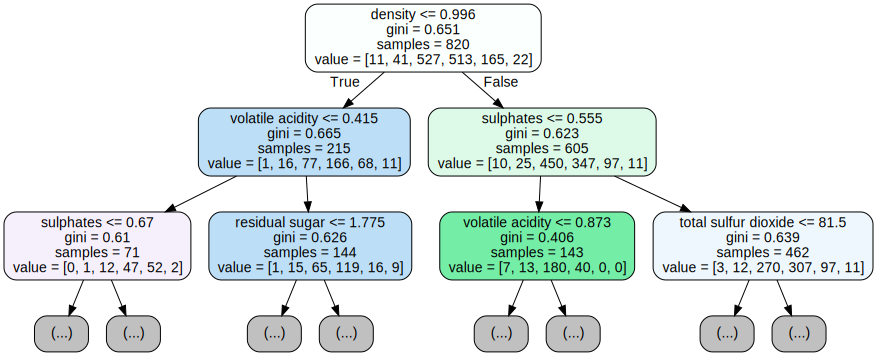

In [ ]:
valgTre